In [12]:
import pandas as pd  
import matplotlib.pyplot as plt
import os

os.chdir(r'C:\Users\Venia\Desktop\reddit_music')

df=pd.read_csv("data\\RedditMusic.csv")
top_g=pd.read_csv("data\\raw_data\\TOP_GENRE.csv")
melted_g=pd.read_csv("data\\raw_data\\GENRES_melted.csv")

In [13]:
df=pd.merge(df,top_g, on='artist', how = 'left')

df['top_genre'] = df['top_genre'].fillna("UNKNOWN")

vals = df.groupby(['label','artist'])['author'].count().sort_values().reset_index()

# df should be all posts with the subreddit, author, artist, and label as the columns
def create_bars(df, cluster_start, category= 'top_genre', show_bottom=False):
    df.dropna(subset=[category])
    vals=df.groupby(['label',category])['author'].count()
    vals=vals.reset_index()
    lis = [[i,j] for i in range(5) for j in range(2)]
    fig,axs = plt.subplots(5, 2, figsize=(15,10))
    plt.tight_layout(h_pad=1.2, pad =2.5)
    p= cluster_start
    for i,j in lis:
        ax = axs[i][j]
        name = p
        p+=1
        ax.set_title(name, loc='left')
        ax.set_frame_on(False)
        if show_bottom==True:
            data = vals[vals['label']==name].sort_values(by='author',ascending=False).head(5)
            data2 = vals[vals['label']==name].sort_values(by='author',ascending=False).tail(5)
            data=data.append(data2)
        else:
            data = vals[vals['label']==name].sort_values(by='author',ascending=False).head(10)
        ax.bar(data[category], data['author'])
        ax.tick_params(axis='both', labelrotation=20, labelsize=8)
    plt.tight_layout()

df['artist']= df['artist'].apply(lambda x: x.replace('$','S'))



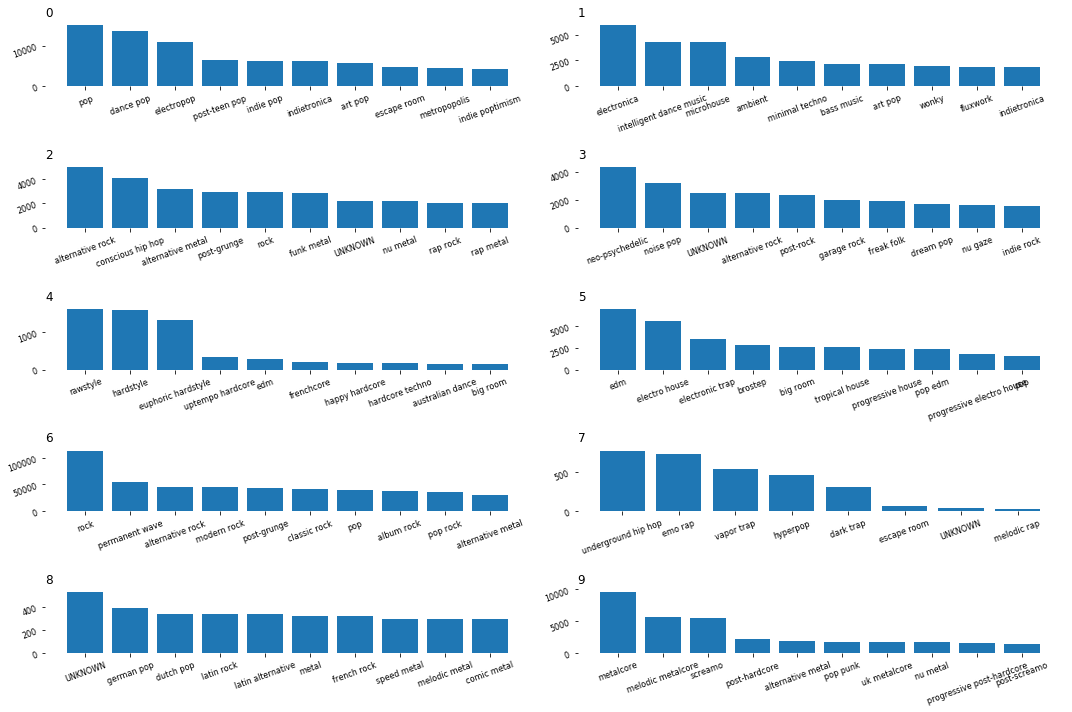

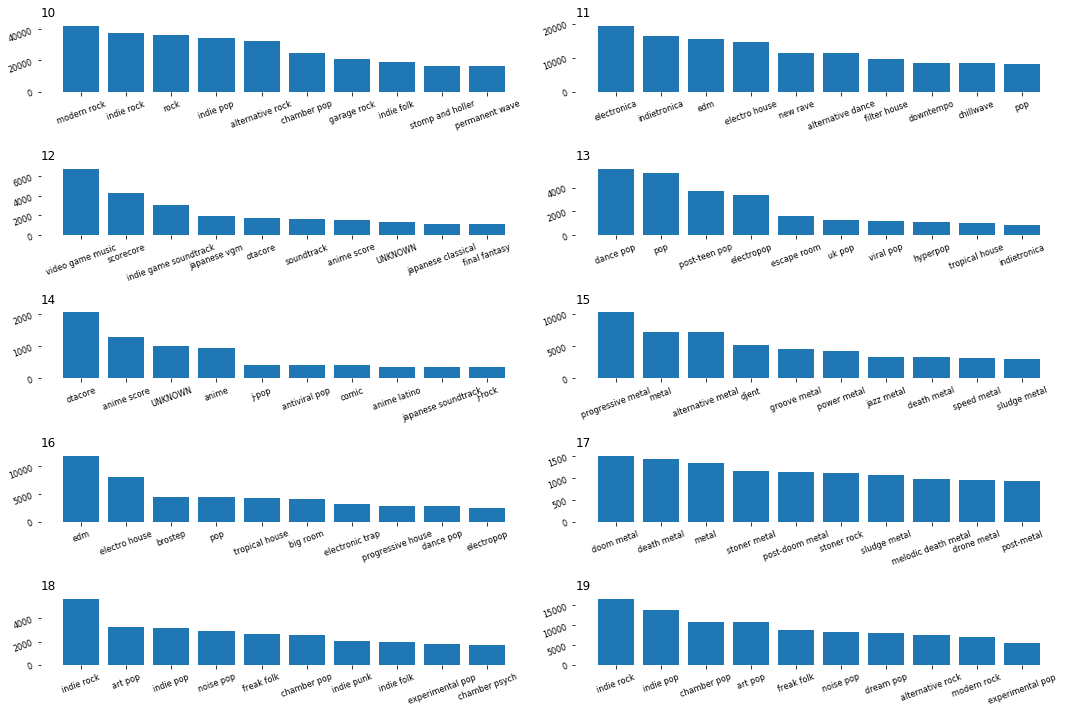

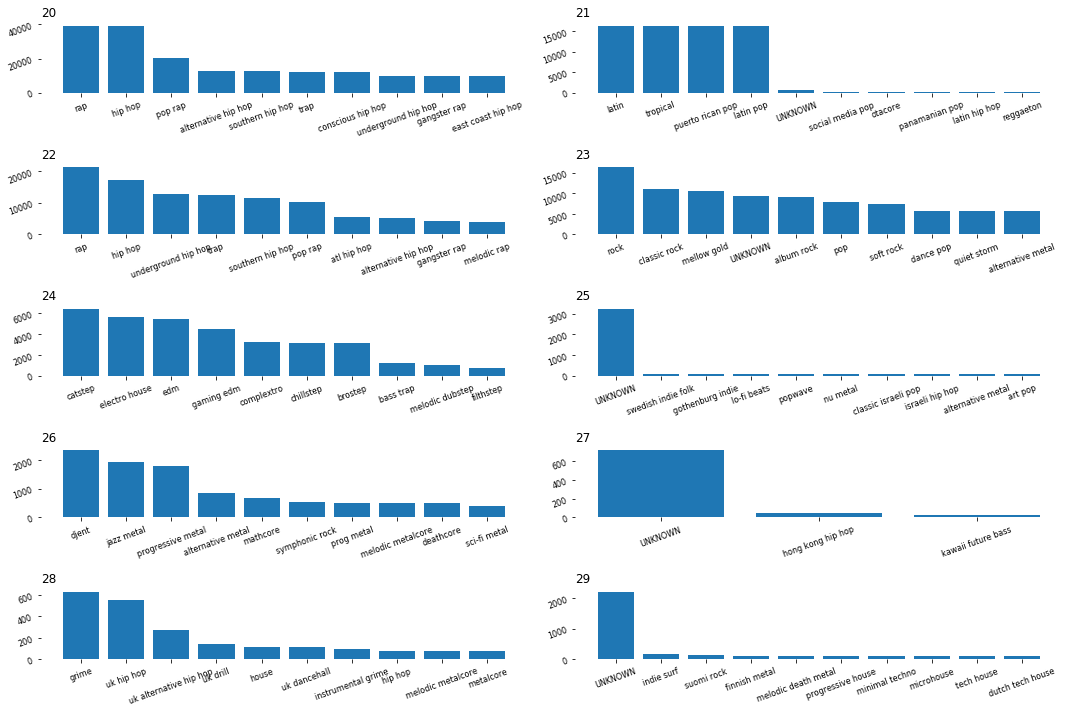

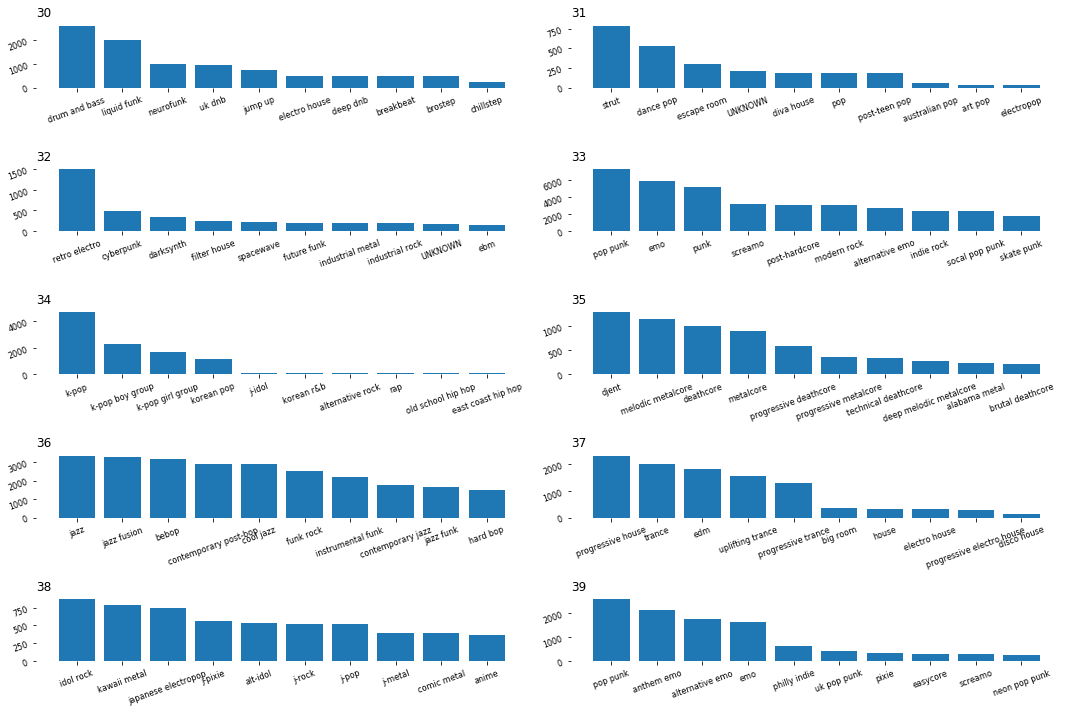

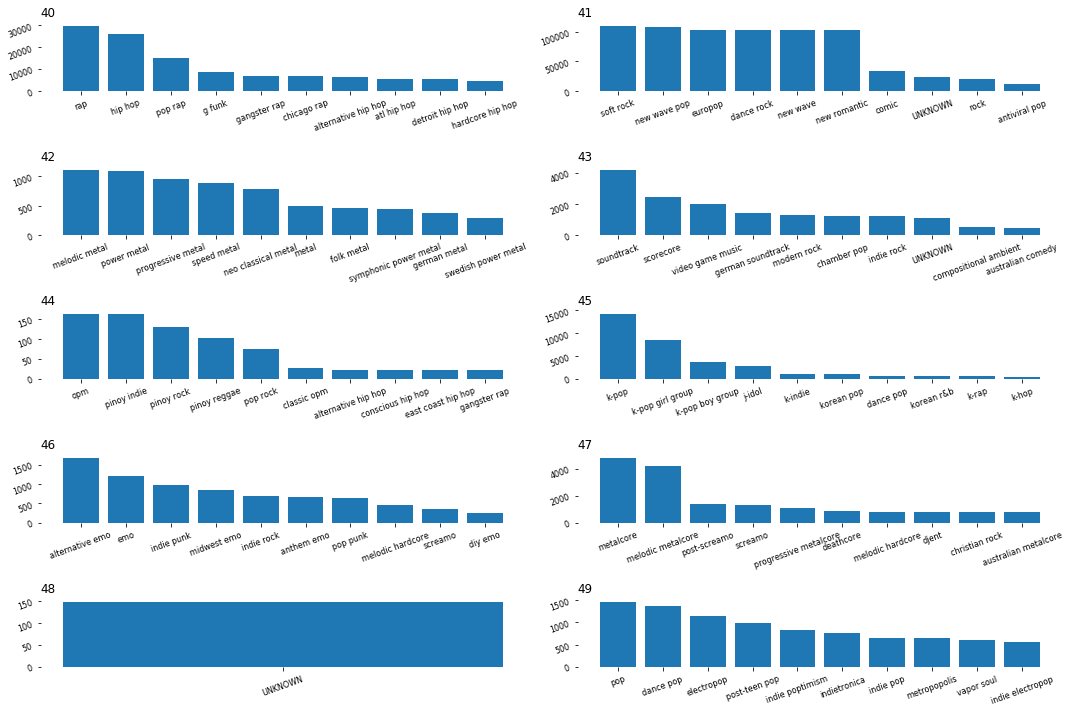

In [6]:
for i in [0,10,20,30,40]:
    category = 'value'
    create_bars(df, i, category=category)
    plt.savefig(r'visuals\naming_genres\custom_genre_50_{}_{}'.format(category, i))
plt.show()

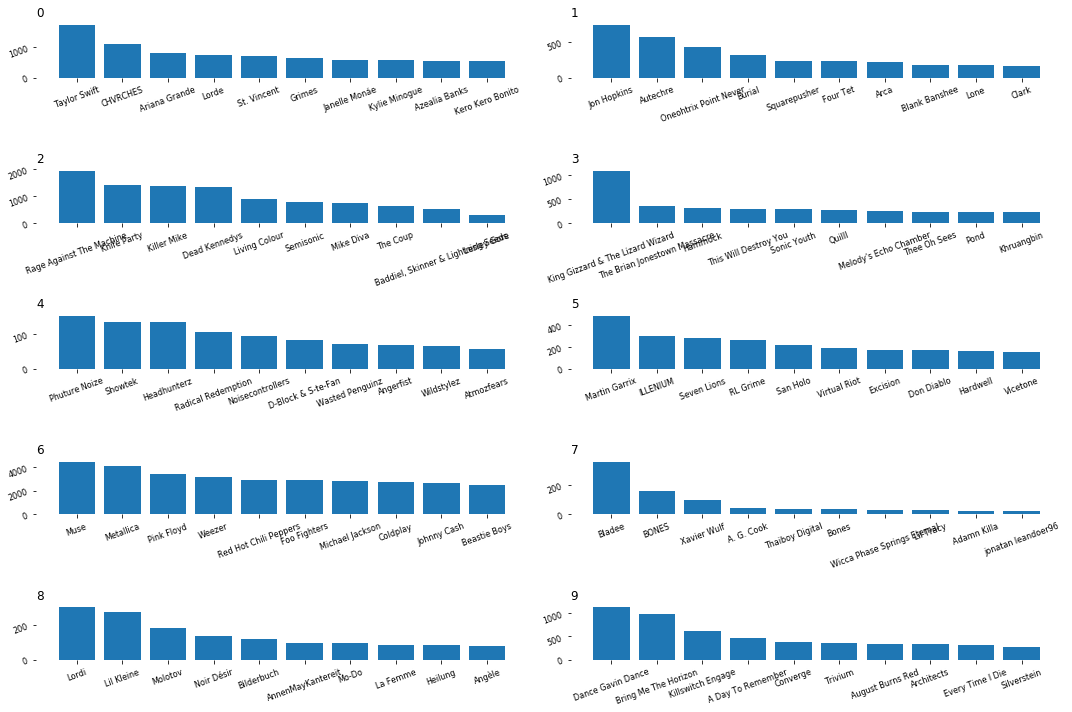

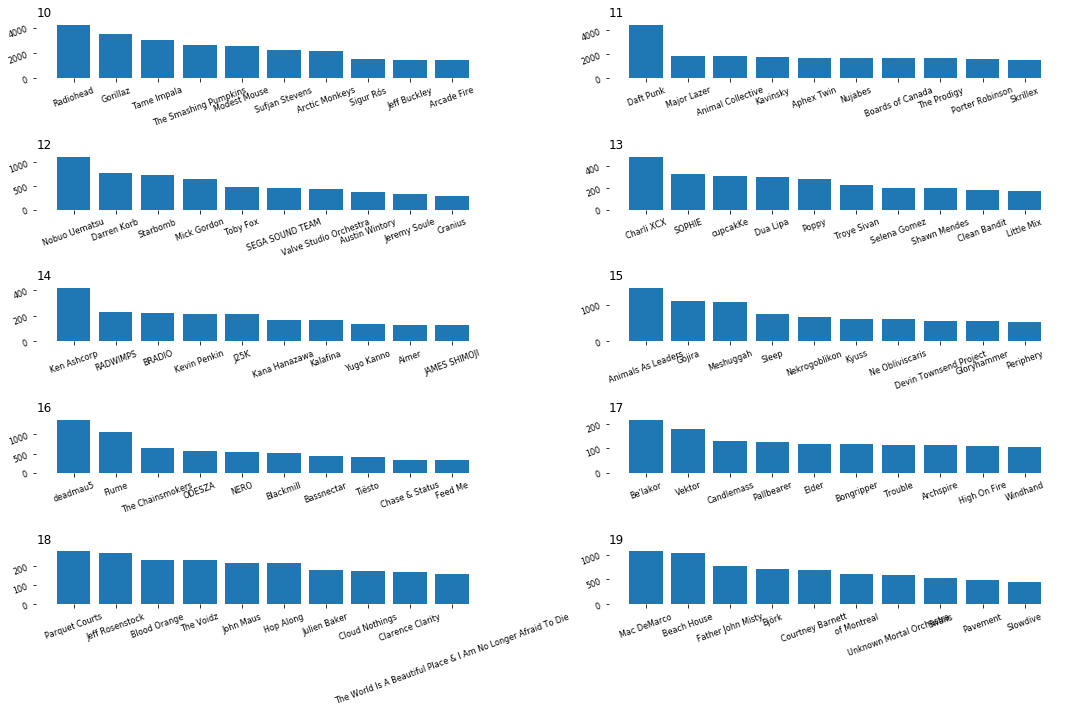

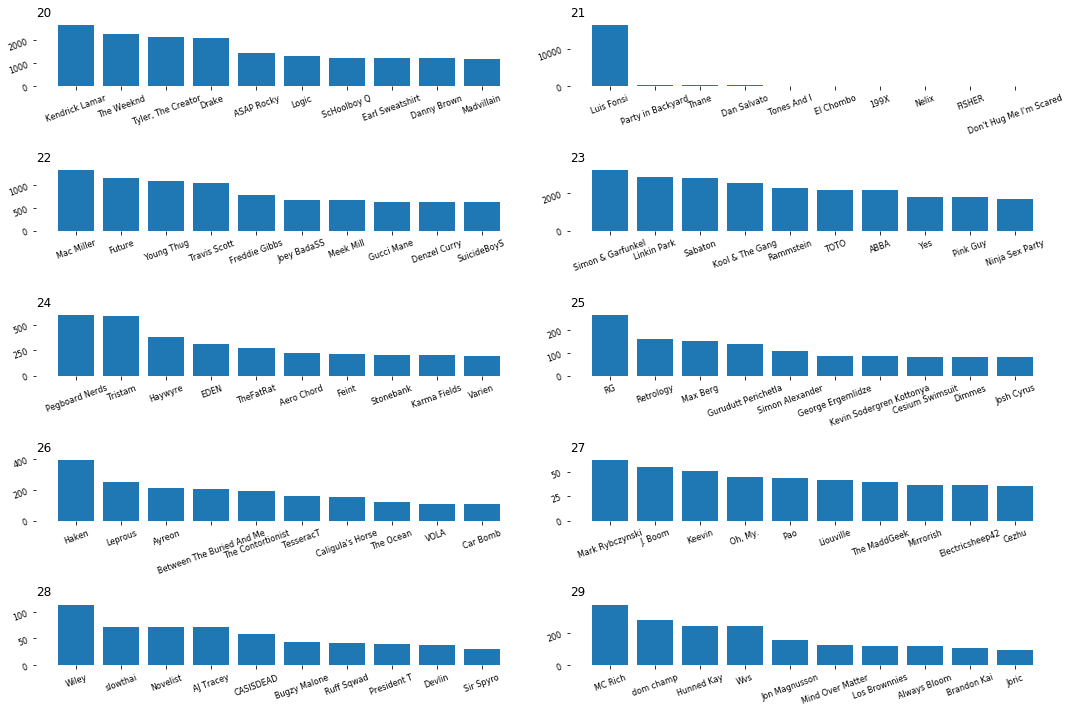

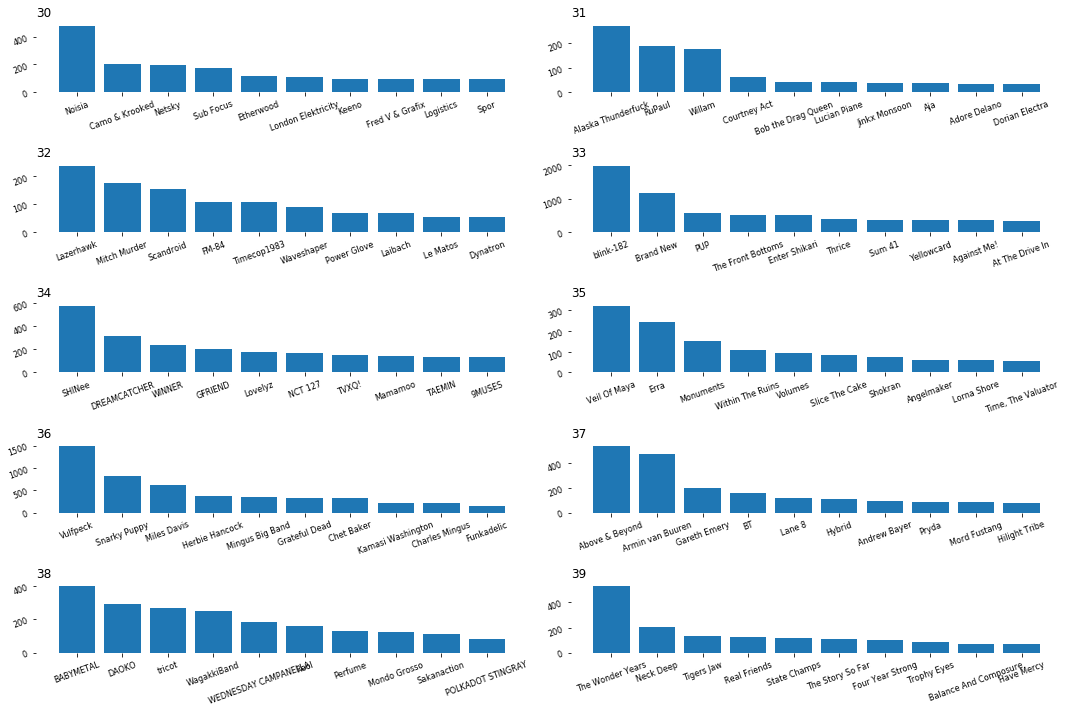

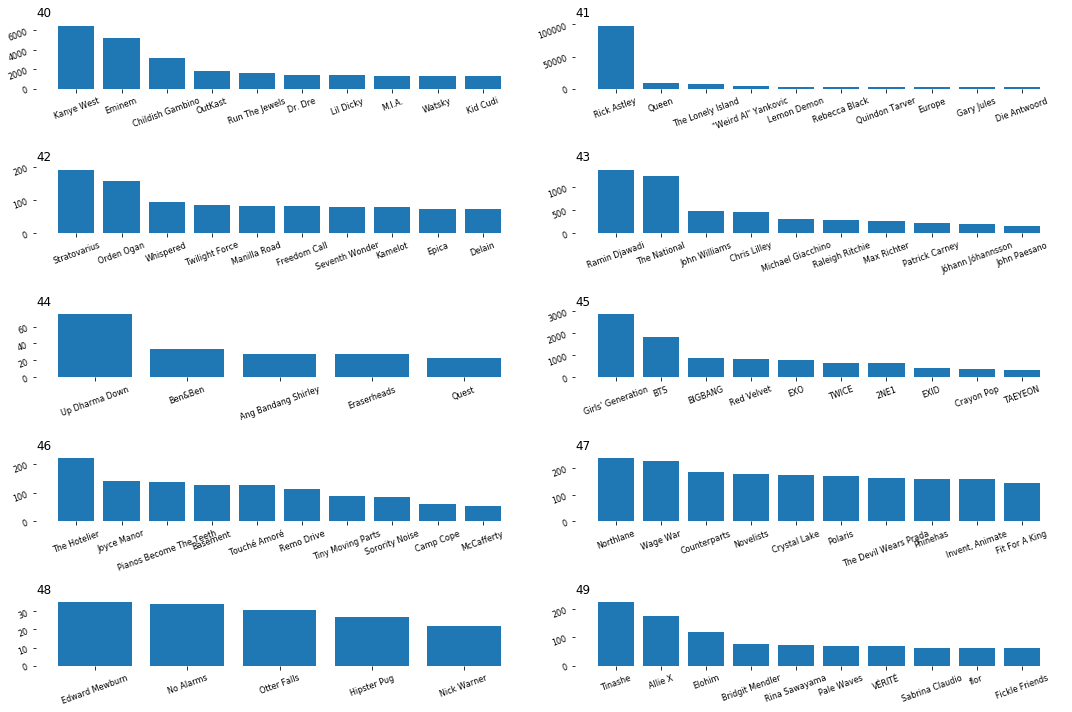

In [82]:
for i in [0,10,20,30,40]:
    category = 'artist'
    create_bars(df, i, category=category)
    plt.savefig(r'visuals\naming_genres\custom_genre_50_{}_{}'.format(category, i))
plt.show()

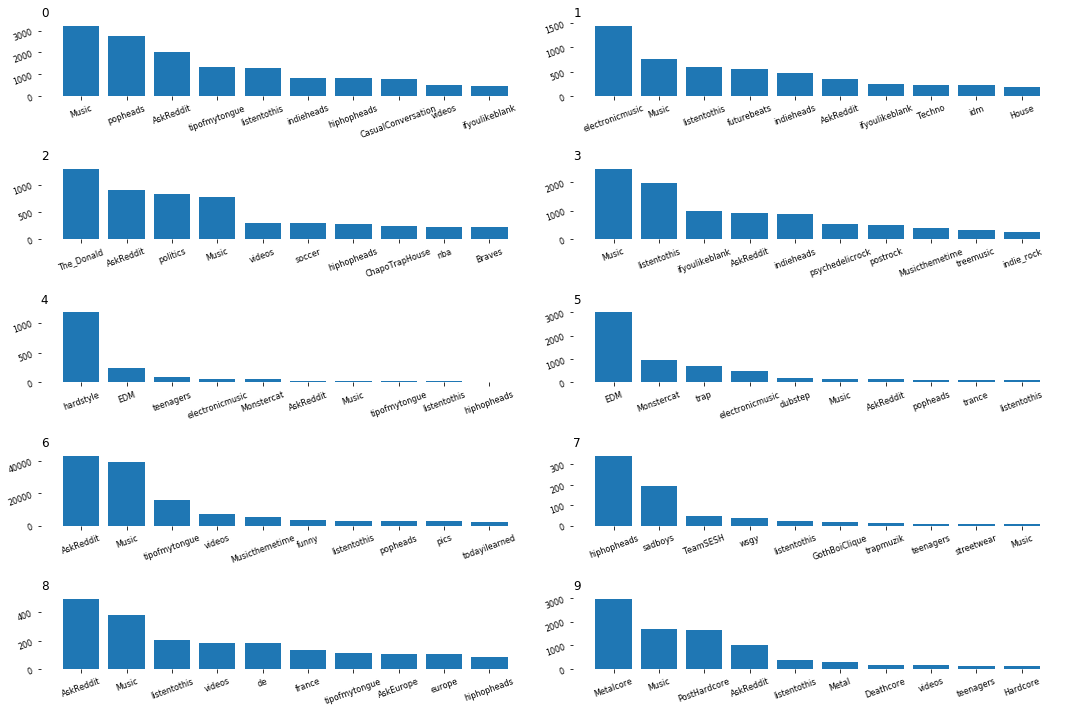

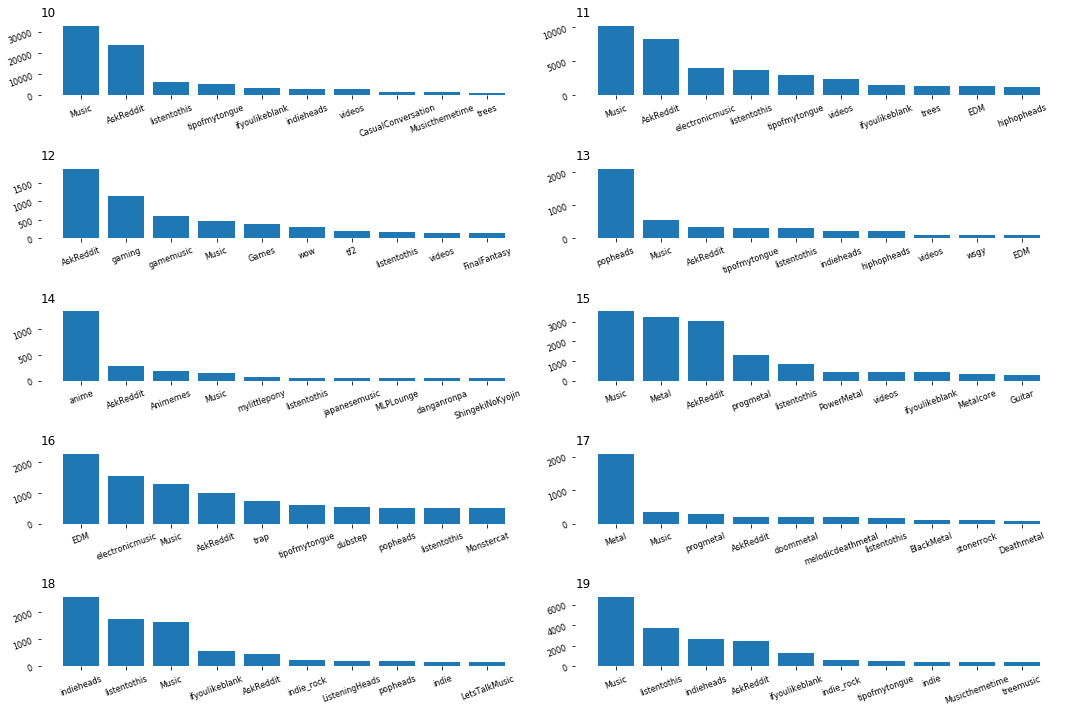

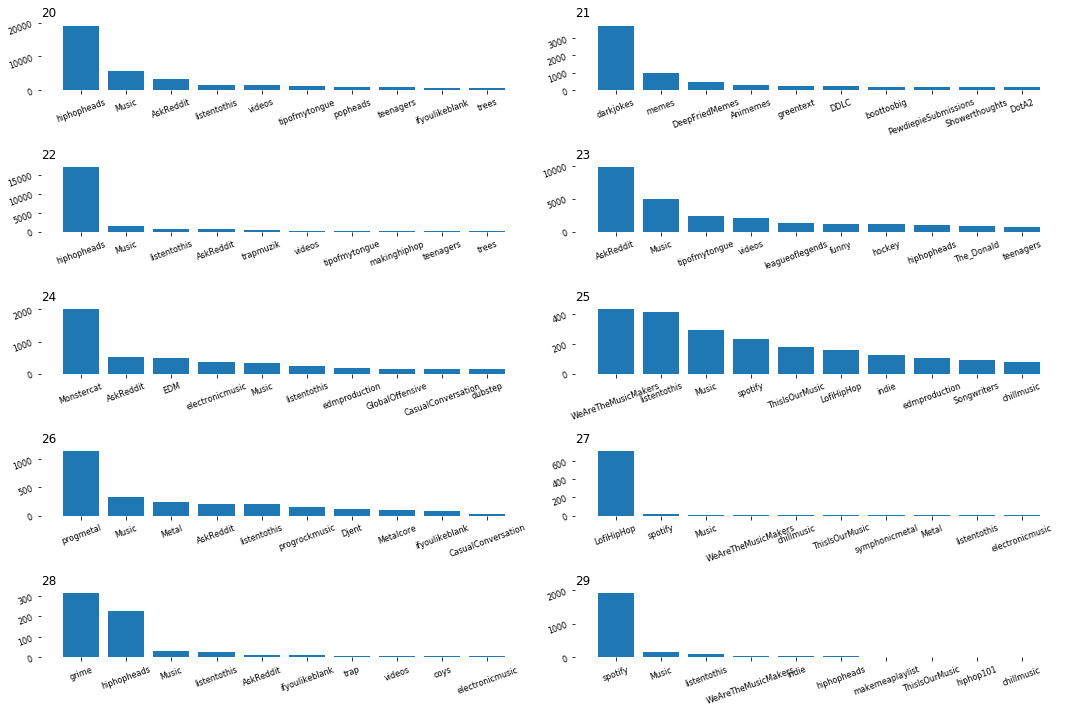

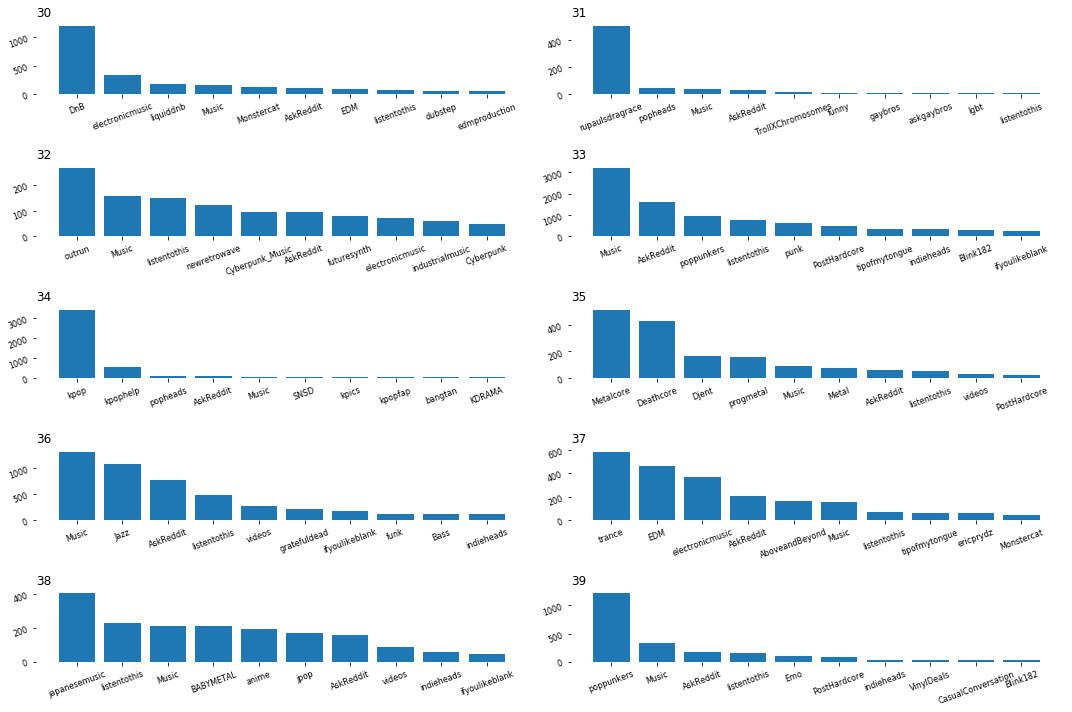

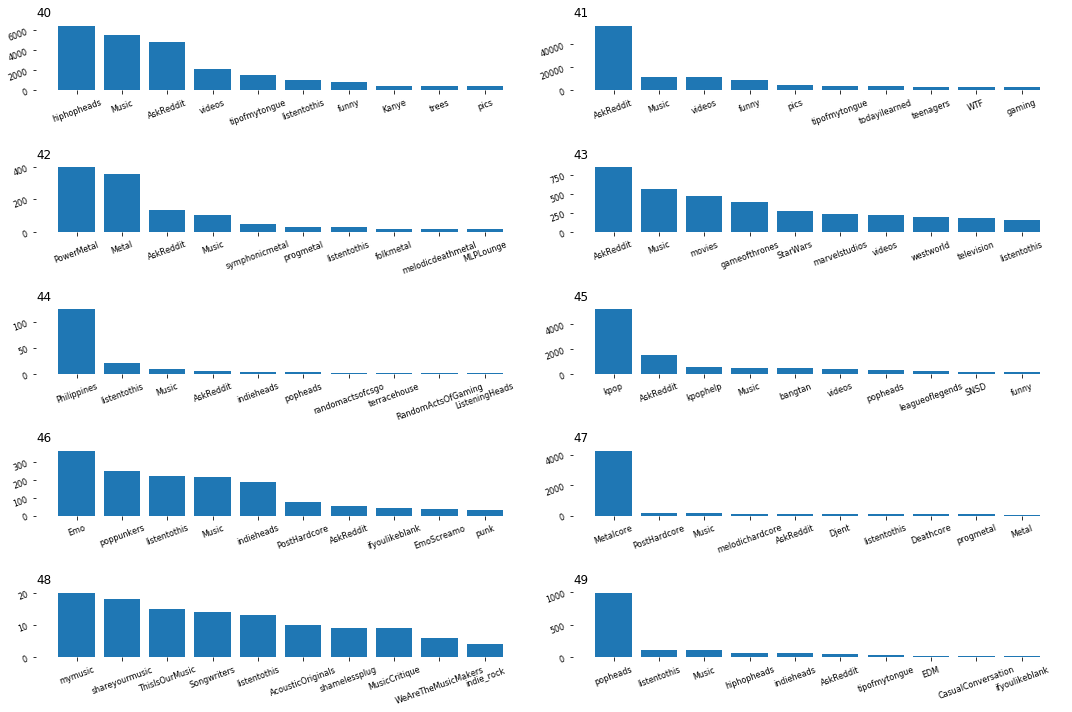

In [84]:
for i in [0,10,20,30,40]:
    category = 'subreddit'
    create_bars(df, i, category=category)
    plt.savefig(r'visuals\naming_genres\custom_genre_50_{}_{}'.format(category, i))
plt.show()

This features some code used for creating the latex tables

In [102]:
v1 = df[(df['label']==0) & (df['top_genre'] != "UNKNOWN")].groupby('top_genre')['artist'].count().sort_values(ascending=False).head(10).reset_index()

In [103]:
v2=df[df['label']==0].groupby('subreddit')['artist'].count().sort_values(ascending=False).head(10).reset_index()

In [104]:
v3= df[df['label']==0].groupby('artist')['score'].count().sort_values(ascending=False).head(10).reset_index()

In [105]:
v1 = pd.merge(v1,v2, left_index=True,right_index=True)
v1 = pd.merge(v1,v3, left_index=True,right_index=True)

In [106]:
val = ""
for i, row in v1.iterrows():
    val += "{} & {} & {} & {} & {} & {} \\".format(row[0].replace("&","\&"),row[1],row[2].replace("&","\&"),row[3],row[4].replace("&","\&"),row[5])

In [68]:
genre_names = pd.read_csv("data\\genre_names_f.csv")

In [71]:
genre_names[genre_names['label'] ==1]['genre'].values[0]

'electronica'

In [81]:
def create_latex(label):
    v1 = df[(df['label']==label) & (df['top_genre'] != "UNKNOWN")].groupby('top_genre')['artist'].count().sort_values(ascending=False).head(10).reset_index()
    v2=df[df['label']==label].groupby('subreddit')['artist'].count().sort_values(ascending=False).head(10).reset_index()
    v3= df[df['label']==label].groupby('artist')['score'].count().sort_values(ascending=False).head(10).reset_index()
    v1 = pd.merge(v1,v2, left_index=True,right_index=True)
    v1 = pd.merge(v1,v3, left_index=True,right_index=True)
    val = "\\begin{table}[t] \n \
    \\tiny \n \
    \\centering \n \
    \\begin{tabular}{llllll}\\multicolumn{6}{c}{\\textbf{Social Genre" +str(label) + ": " +genre_names[genre_names['label'] ==label]['genre'].values[0]+"}} \\ \\toprule \\multicolumn{2}{c}{Spotify genres} & \\multicolumn{2}{c}{Reddit communities} & \\multicolumn{2}{c}{Artists} \\\\ Name & Count & Name & Count & Name & Count \\\\"
    for i, row in v1.iterrows():
        val += "{} & {} & {} & {} & {} & {} \\\\ \n".format(row[0].replace("&","\&"),row[1],row[2].replace("&","\&"),row[3],row[4].replace("&","\&"),row[5])
    val += "\\bottomrule \
    \\end{tabular} \n \
    \\label{genre{}} \n \
    \\end{table} \n"
    return val

In [82]:
all_vals = ""
for i in range(50):
    all_vals = all_vals + create_latex(i)

In [83]:
print(all_vals)

\begin{table}[t] 
     \tiny 
     \centering 
     \begin{tabular}{llllll}\multicolumn{6}{c}{\textbf{Social Genre0: pop}} \ \toprule \multicolumn{2}{c}{Spotify genres} & \multicolumn{2}{c}{Reddit communities} & \multicolumn{2}{c}{Artists} \\ Name & Count & Name & Count & Name & Count \\pop & 15122 & Music & 3212 & Taylor Swift & 1733 \\ 
indie pop & 2802 & popheads & 2748 & CHVRCHES & 1111 \\ 
dance pop & 2541 & AskReddit & 2030 & Ariana Grande & 809 \\ 
electropop & 1043 & tipofmytongue & 1320 & Lorde & 746 \\ 
rock & 647 & listentothis & 1265 & St. Vincent & 725 \\ 
detroit hip hop & 288 & indieheads & 811 & Grimes & 661 \\ 
latin & 265 & hiphopheads & 806 & Janelle Monáe & 566 \\ 
pop rock & 207 & CasualConversation & 762 & Kylie Minogue & 565 \\ 
pop rap & 191 & videos & 480 & Azealia Banks & 560 \\ 
modern rock & 157 & ifyoulikeblank & 460 & Kero Kero Bonito & 536 \\ 
\bottomrule     \end{tabular} 
     \label{genre{}} 
     \end{table} 
\begin{table}[t] 
     \tiny 
     \center